<span style="color:#51a2d6; font-size:24px; font-weight:700"> DBSCAN Algorithm</span>

In this practice, we will apply DBSCAN to the same data sets as in [k-means clustering practice](KMeans_Clustering.ipynb), 
so look at that practice first if you haven't already done so.

In [1]:
install.packages("dbscan")
library(dbscan)
install.packages("fpc")
install.packages("factoextra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


'data.frame':	150 obs. of  3 variables:
 $ X    : num  2.28 3.78 5.15 2.59 2.34 ...
 $ Y    : num  3.56 5.28 5.82 3.54 4.39 ...
 $ class: int  1 1 1 1 1 1 1 1 1 1 ...


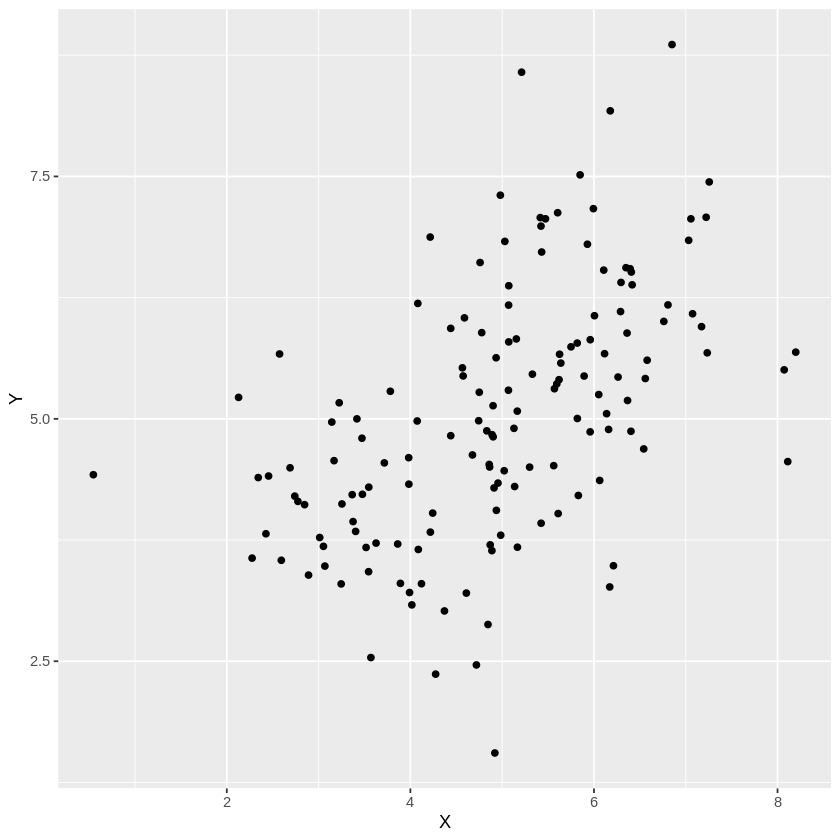

In [2]:
# read data from the file
points_data2 <- read.csv("/dsa/data/all_datasets/toydata/data2.csv",header=TRUE)

str(points_data2)
# Visualize the data
library(ggplot2)
plot1 <- ggplot(points_data2, aes(X, Y)) + geom_point(colour="black")
plot1

Find optimal eps value and nunber of nearest neighbours to be considered for forming clusters. 

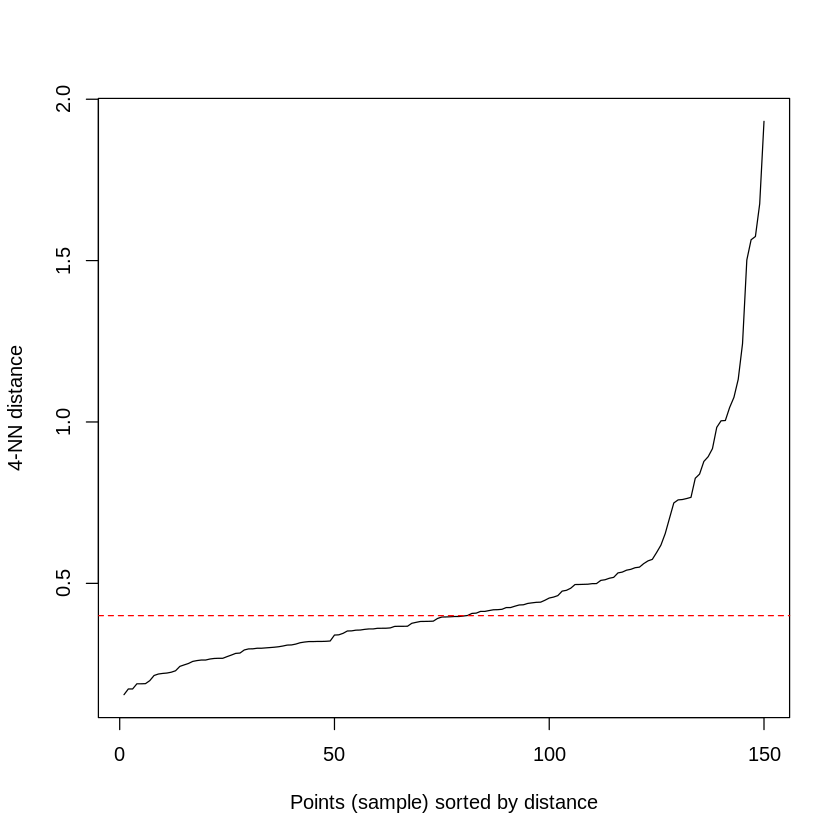

In [3]:
dbscan::kNNdistplot(points_data2[,1:2], k =  4)
abline(h = 0.4, lty = 2,col='red')

Let's run `dbscan` on this data set; use `eps`=0.4 and `MinPts`=4 and see if it can 
find the two clusters that are labeled in the data set. 


Attaching package: ‘fpc’

The following object is masked from ‘package:dbscan’:

    dbscan

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


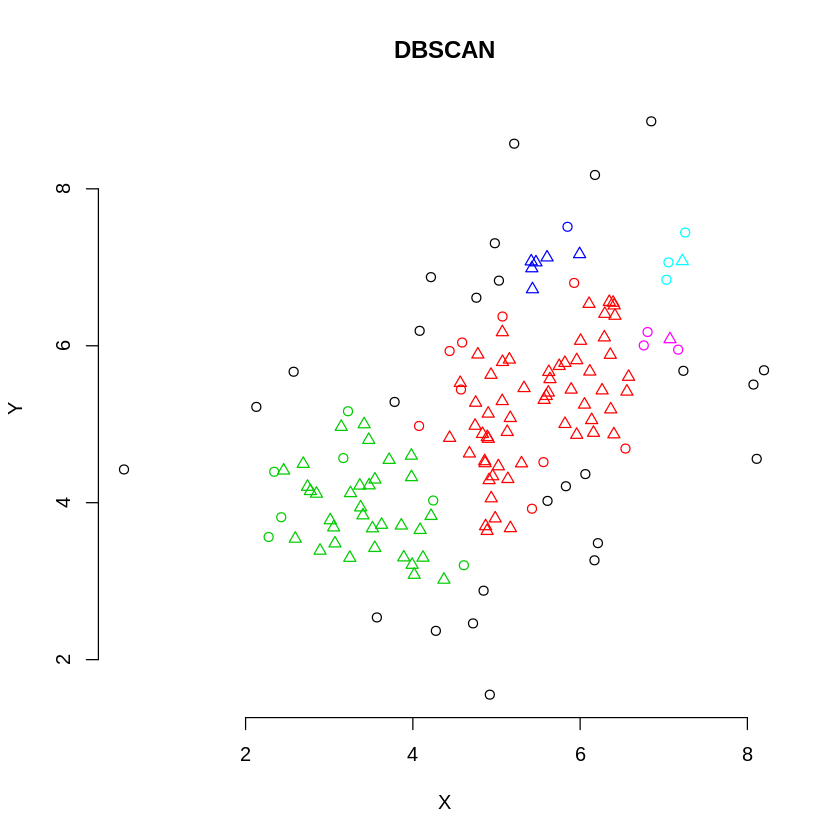

In [4]:
library("fpc")
library("factoextra")
set.seed(42)
db <- fpc::dbscan(points_data2[, 1:2], eps = 0.4, MinPts = 4)
# Plot DBSCAN results
plot(db, points_data2[, 1:2], main = "DBSCAN", frame = FALSE)

DBSCAN did find two major clusters but there are many small clusters which are invalid. Many outliers are detected. Plot the points using fviz_cluster()

Warning message:
“argument frame is deprecated; please use ellipse instead.”

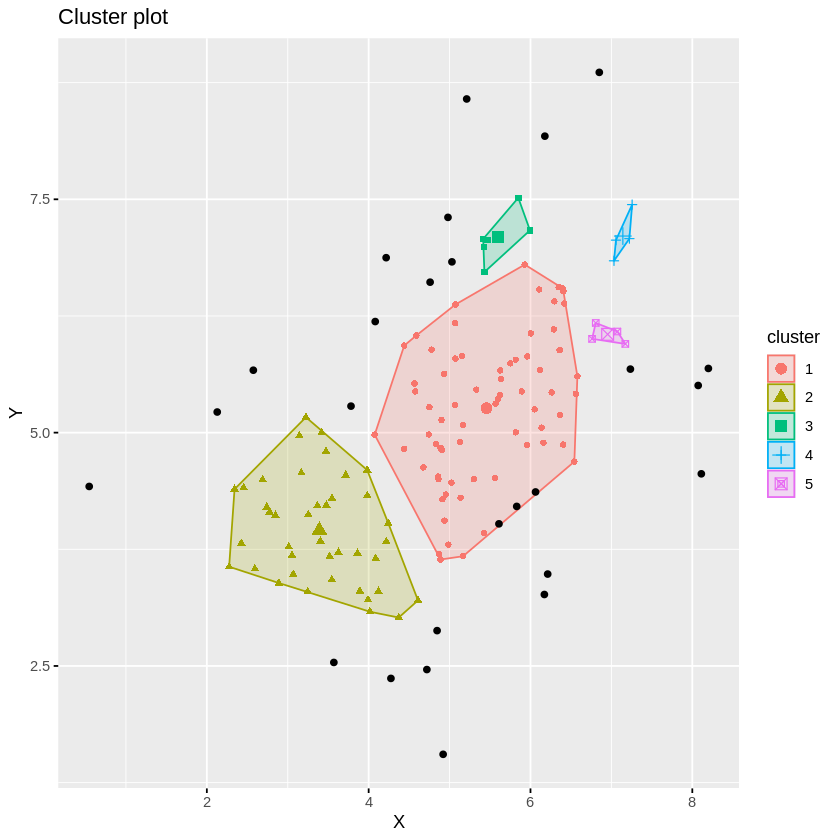

In [5]:
# also, plot the results using fviz
fviz_cluster(db, points_data2[, 1:2], stand = FALSE, frame = FALSE, geom = "point")

Again there are some extra clusters, let's increase the `eps` to 0.5 and see what happens. 

## <span style="background:yellow">YOUR TURN</span>

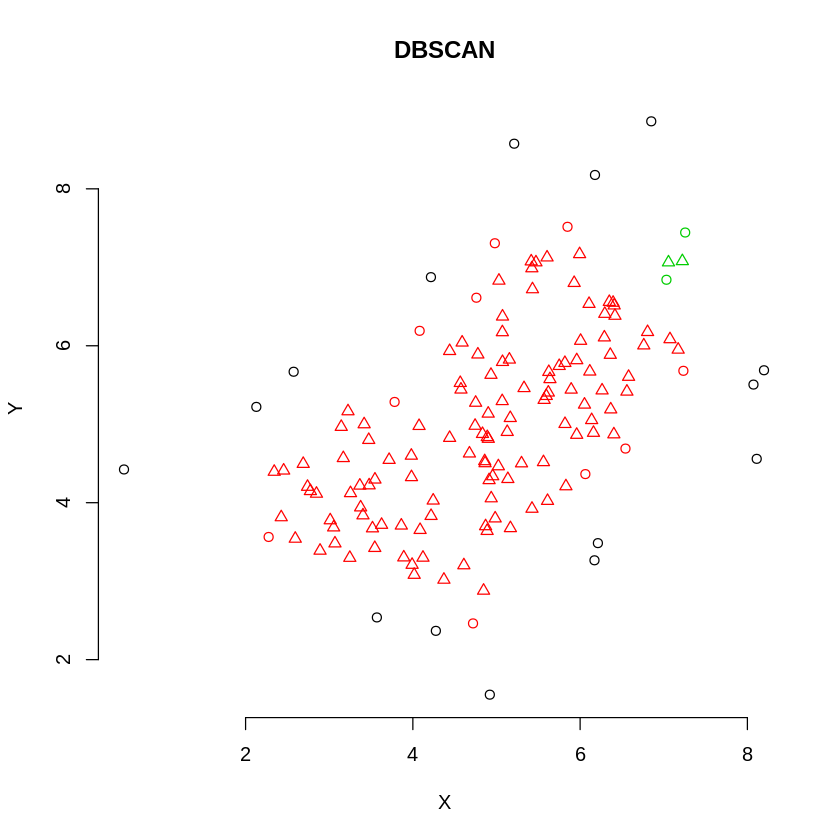

In [6]:
db <- fpc::dbscan(points_data2[, 1:2], eps = 0.5, MinPts = 4)
# Plot DBSCAN results
plot(db, points_data2[, 1:2], main = "DBSCAN", frame = FALSE)

DBScan put almost all points into the same cluster with some outliers; 
it is somewhat sensitive to the choice of `eps`. 

Let's try it on the third data set where we know there are 3 or 6 clusters depending on the scale. 

'data.frame':	250 obs. of  3 variables:
 $ X    : num  1.293 0.979 0.691 1.555 1.192 ...
 $ Y    : num  0.704 0.59 1.502 1.257 0.713 ...
 $ class: int  1 1 1 1 1 1 1 1 1 1 ...


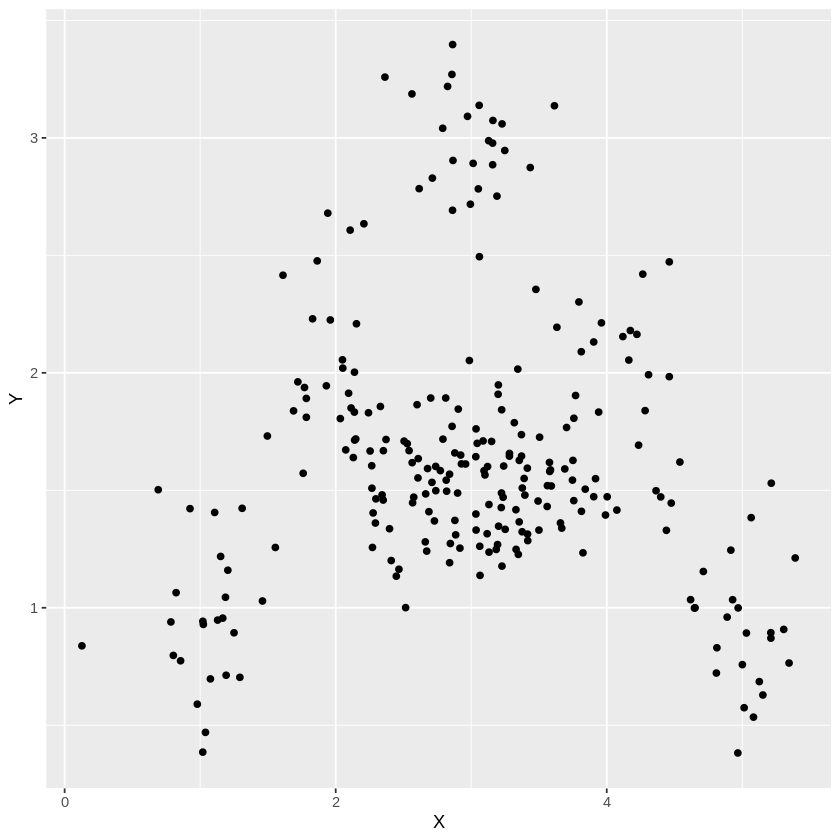

In [7]:
# read data from the file
points_data3 <- read.csv("/dsa/data/all_datasets/toydata/data3.csv",header=TRUE)

str(points_data3)
# Visualize the data
library(ggplot2)
plot1 <- ggplot(points_data3, aes(X, Y)) + geom_point(colour="black")
plot1

Decrease the eps value to 0.25 and and minPts to 3 and see what happens. 

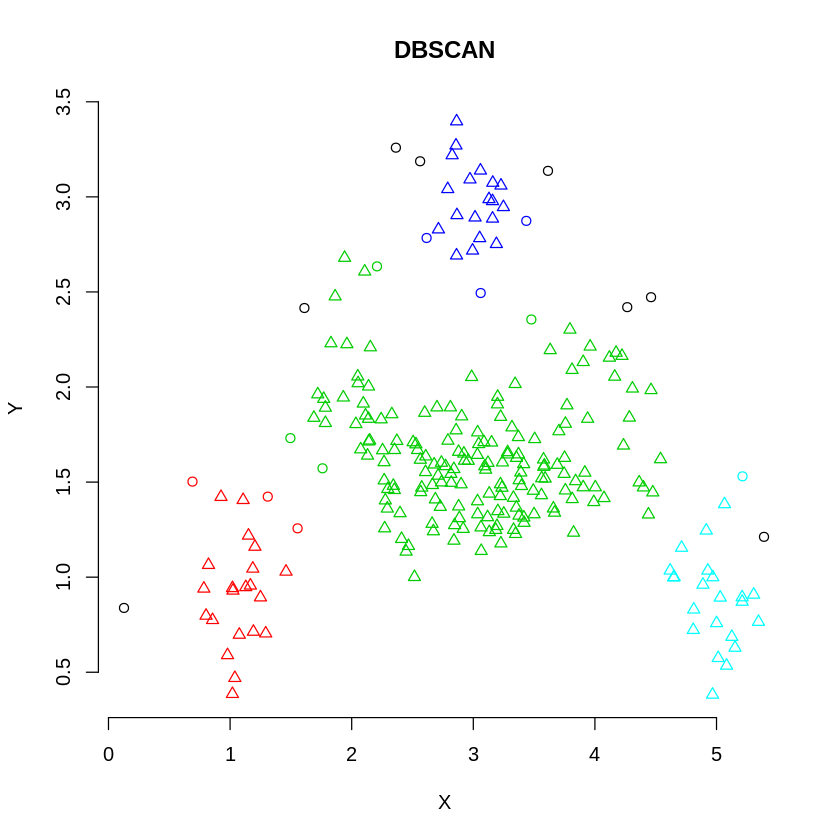

In [8]:
db <- fpc::dbscan(points_data3[, 1:2], eps = 0.25, MinPts = 3)
# Plot DBSCAN results
plot(db, points_data3[, 1:2], main = "DBSCAN", frame = FALSE)

Warning message:
“argument frame is deprecated; please use ellipse instead.”

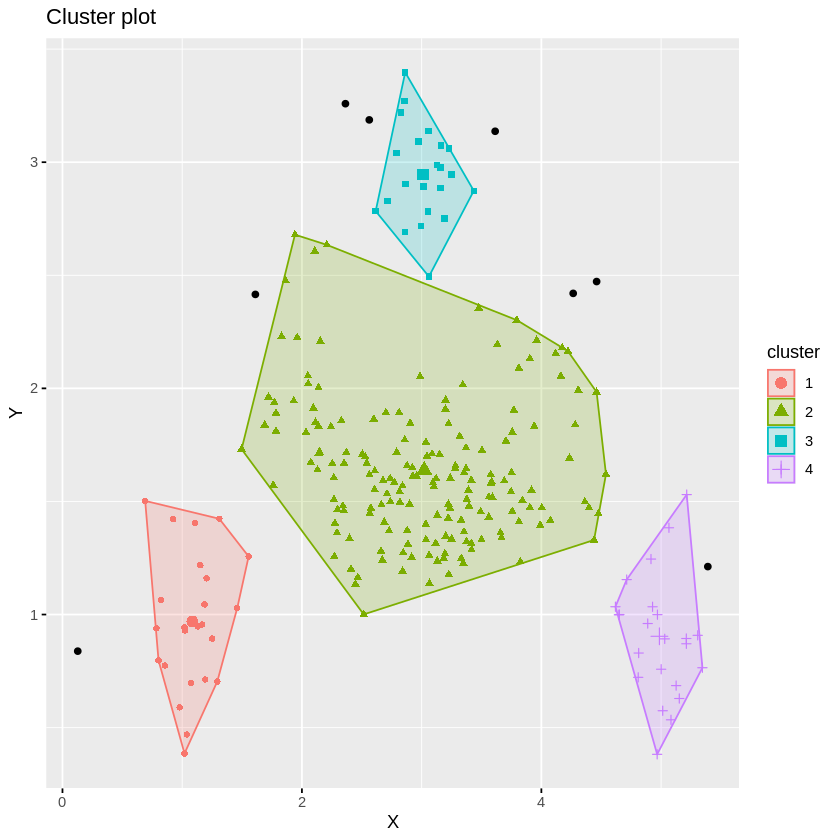

In [9]:
# also, plot the results using fviz
fviz_cluster(db, points_data3[, 1:2], stand = FALSE, frame = FALSE, geom = "point")

Let's try it for a smaller eps (0.2) and larger MinPts (5) to see if it can capture six clusters. 

## <span style="background:yellow">YOUR TURN</span>

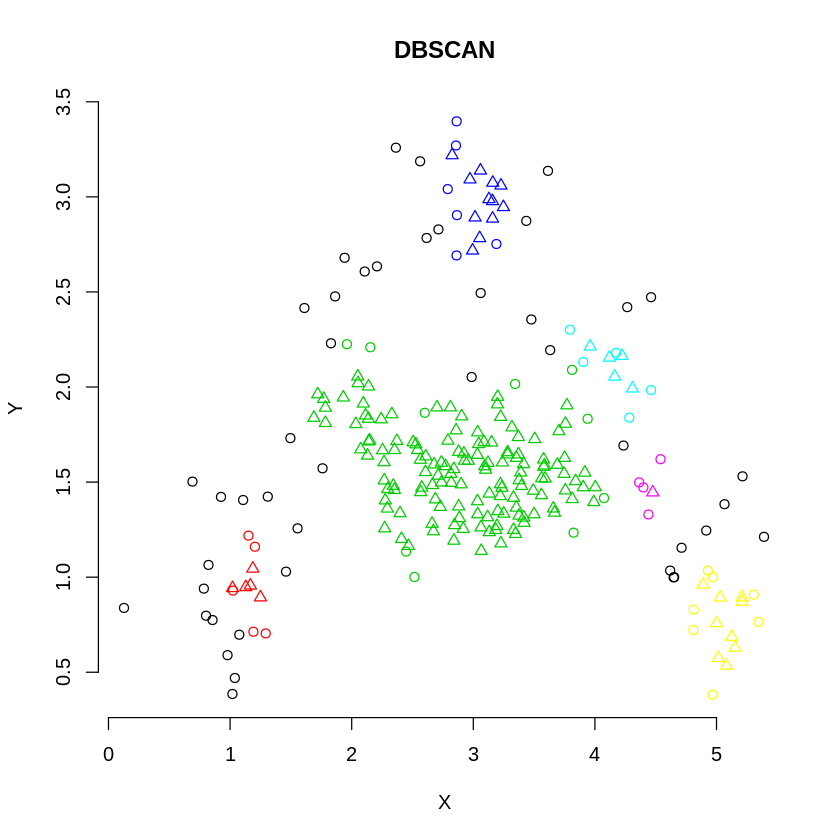

In [10]:
db <- fpc::dbscan(points_data3[,1:2], eps=0.2, MinPts=5)
# Plot DBSCAN results
plot(db, points_data3[, 1:2], main = "DBSCAN", frame = FALSE)

As you can see, 
dbscan was able to find 6 clusters with a smaller eps value. 
The clusters are overlapping, have different densities, and have outliers; 
dbscan can easily merge clusters for a slightly larger eps, or produce many outliers 
for a slightly smaller eps for this data set. 

# Save your notebook!